# GTC ML Project 1 - Data Cleaning & Preprocessing Challenge

## Business Problem
The revenue team has identified that last-minute booking cancellations significantly impact profitability. Your task is not to build the final model, but to prepare the raw data for it. The quality of your data cleaning will directly determine the model's future success.

## Objective
Build a robust data preprocessing pipeline for a hotel booking cancellation prediction model.

You are given a raw dataset (hotel_bookings.csv) direct from our Property Management System (PMS). Your goal is to transform it into a clean, machine-learning-ready dataset by completing the following phases.

# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

In [60]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the data
data = pd.read_csv("hotel_bookings-hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
# Generate summary statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


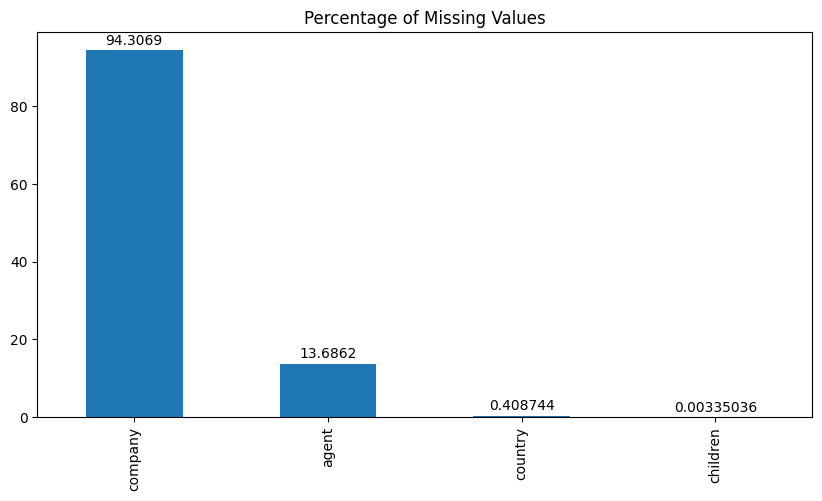

In [64]:
# Identify all percentage of missing values add labels to the bar chart
    
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False, inplace=True)
ax = missing_percentage.plot(kind='bar', figsize=(10, 5), title='Percentage of Missing Values')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=2)
plt.show()

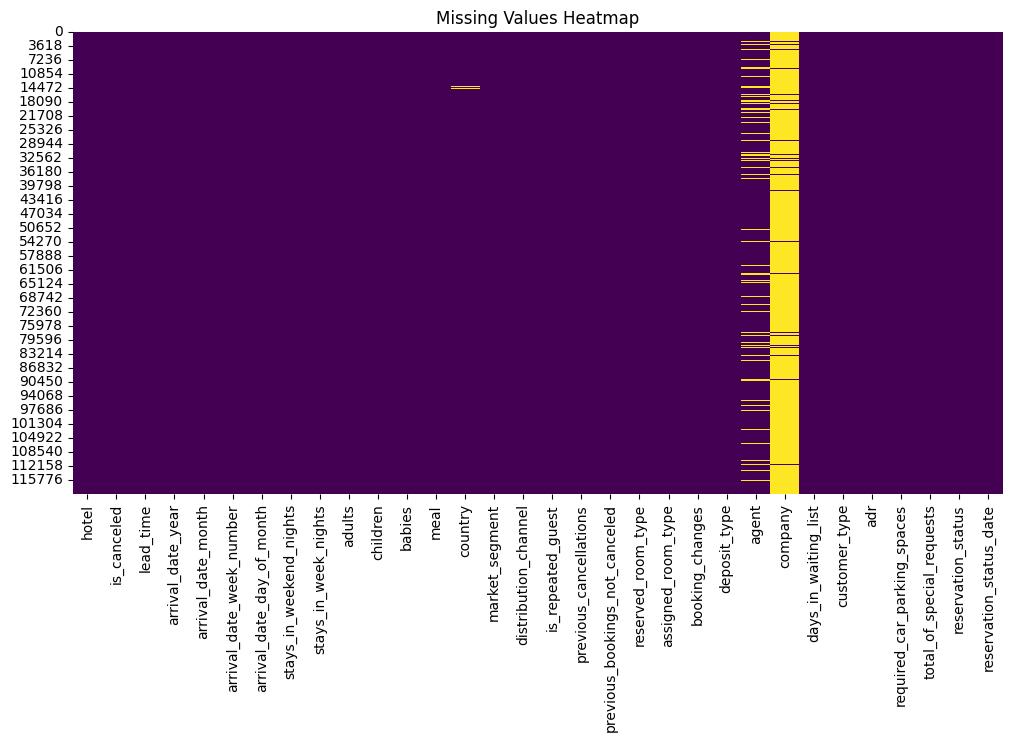

In [65]:
# Create a visualization to show missing data
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

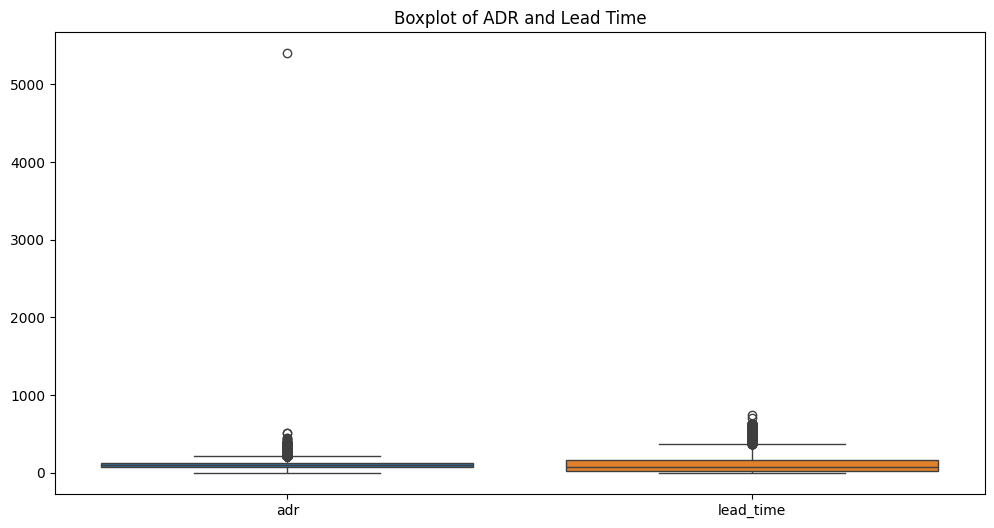

Number of outliers in adr: 3793
Number of outliers in lead_time: 3005


In [66]:
# Detect outliers in key numerical columns using boxplots and IQR
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['adr', 'lead_time']])
plt.title('Boxplot of ADR and Lead Time')
plt.show()

# Calculate IQR
Q1 = data[['adr', 'lead_time']].quantile(0.25)
Q3 = data[['adr', 'lead_time']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data[['adr', 'lead_time']] < (Q1 - 1.5 * IQR)) | (data[['adr', 'lead_time']] > (Q3 + 1.5 * IQR)))
print('Number of outliers in adr:', outliers['adr'].sum())
print('Number of outliers in lead_time:', outliers['lead_time'].sum())

# Data Quality Findings

## Main Data Quality Issues
- **Missing Values**: High in 'company' (94%), moderate in 'agent', low in 'country' and 'children'.
- **Outliers**: Significant in 'adr' and 'lead_time', which could skew analysis.
- **Duplicates**: Likely present, need to check.
- **Data Types**: Date columns need formatting.
- **Other**: Potential negative values in 'adr', categorical inconsistencies.

## Recommendations
- Impute missing values appropriately.
- Handle outliers by capping or removal.
- Remove duplicates.
- Convert data types for dates.

# Phase 2: Data Cleaning (The Core of the Project)

In [67]:
# Handle Missing Values
# For company and agent: Replace with "None" or 0
data['company'].fillna('None', inplace=True)
data['agent'].fillna(0, inplace=True)

# For country: Impute with mode (most frequent country) or a new "Unknown" category
data['country'].fillna(data['country'].mode()[0], inplace=True)

# For children: A small number of missing values could be imputed with the median or mode
data['children'].fillna(data['children'].median(), inplace=True)

data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [68]:
# Remove Duplicates: Identify and drop any exact duplicate rows
duplicate_rows = data[data.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')
data.drop_duplicates(inplace=True)
print(f'Dataset shape after removing duplicates: {data.shape}')

Number of duplicate rows: 32013
Dataset shape after removing duplicates: (87377, 32)


In [69]:
# Handle Outliers: Cap extreme values in columns like adr
# Justification: Prevents extreme values from skewing future models, 1000 is a reasonable upper limit for daily rates
data['adr'] = data['adr'].clip(upper=1000)
print('ADR values capped at 1000.')

ADR values capped at 1000.


In [70]:
# Fix Data Types: Ensure date columns are correctly formatted
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], errors='coerce')
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + 
                                      data['arrival_date_month'] + '-' + 
                                      data['arrival_date_day_of_month'].astype(str), 
                                      errors='coerce')
print('Date columns converted to datetime.')

Date columns converted to datetime.


# Phase 3: Feature Engineering & Preprocessing

In [71]:
# Create New Features
data['total_guests'] = data['adults'] + data['children'] + data['babies']
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['is_family'] = ((data['children'] > 0) | (data['babies'] > 0)).astype(int)  # 1 for Yes, 0 for No

print('New features created: total_guests, total_nights, is_family')

New features created: total_guests, total_nights, is_family


In [72]:
# Encode Categorical Variables
# Handle arrival_date_month manually (convert to numerical)
if 'arrival_date_month' in data.columns:
    month_mapping = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
        'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)

# Use One-Hot Encoding for low-cardinality categories
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type']
existing_categorical_cols = [col for col in categorical_cols if col in data.columns]

if existing_categorical_cols:
    data = pd.get_dummies(data, columns=existing_categorical_cols, drop_first=True)

print('Categorical variables encoded using one-hot encoding.')

Categorical variables encoded using one-hot encoding.


In [73]:
# CRITICAL STEP: Remove Data Leakage
# Immediately drop the columns reservation_status and reservation_status_date
data.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)
print('Data leakage columns dropped: reservation_status, reservation_status_date')

Data leakage columns dropped: reservation_status, reservation_status_date


In [74]:
# Final Preparation: Split your cleaned dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Keep only numeric columns for machine learning
numeric_data = data.select_dtypes(include=[np.number])

X = numeric_data.drop(columns=['is_canceled'])
y = numeric_data['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')
print('Dataset split into training and testing sets.')

Training set shape: (69901, 22)
Testing set shape: (17476, 22)
Dataset split into training and testing sets.


In [75]:
print("Data preprocessing pipeline completed!  :) Anas ")

Data preprocessing pipeline completed!  :) Anas 
